# DB Experiments 3, Tuning 07, Pressure3

Devices:
* s980pro250: Samsung 980 PRO 250GB
  * /dev/nvmeXn1p1 (all disk) on /media/auto/s980pro250 type ext4 (rw,relatime,discard)
* s970evp250: Samsung 970 EVO Plus 250GB
  * /dev/nvmeXn1p1 (all disk) on /media/auto/s970evp250 type ext4 (rw,relatime,discard)
* s970evo500: Samsung 970 EVO 500GB
  * /dev/nvmeXn1p1 (all disk) on /media/auto/s970evo500 type ext4 (rw,relatime,discard)

Kernels:
* k504: Ubuntu 20.04 Kernel 5.4
* k508: Ubuntu 20.04 Kernel 5.8

Using:
* Rocksdb_test v1.12
* YCSB with RocksDB 6.15


In [1]:
import sys; sys.path.append('../..')  # using plot.py from the parent directory
import re
import plot
label = lambda f: f'depth={f._params["at_iodepth[0]"]}{", dsync" if f._params.get("at_o_dsync[0]") == "true" else ""}, bs={f._params["at_block_size[0]"]}'
options = plot.Options(
    #save=True,
    #formats=['png'],
    #print_params=True,
    plot_nothing=True,
    #plot_io=True,
    #plot_cpu=True,
    #plot_at3=True,
    #plot_at3_script=True,
    #plot_db=True,
    #plot_pressure=True,
    #pressure_decreased=False,
    #print_pressure_values=True,
    #plot_ycsb_lsm_size=True,
    #plot_ycsb_lsm_details=True,
    #plot_ycsb_lsm_summary=True,
    #plot_containers_io=True,
    #plot_smart_utilization=True,
    db_mean_interval=2,
    plot_all_pressure=True,
    all_pressure_label=label
)
options_i5 = options(db_mean_interval=5)
exp_dir = '.'

## Concurrent Workloads (W)

* 12 concurrent workloads (w1 to w12)
* 4 instance of access_time3 using iodepth 4 and libaio

Graphs from file "./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs4.out.xz":
Concurrent Workloads (at3_script): ./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs4.out.xz


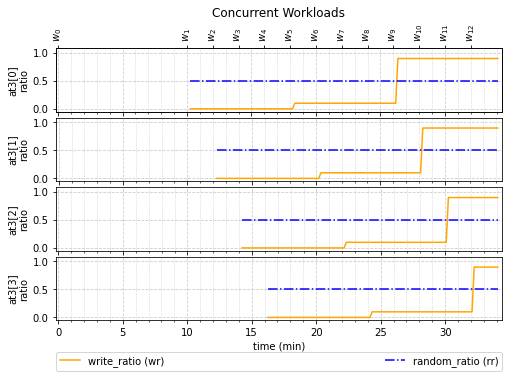

In [2]:
files = plot.getFiles(exp_dir, list_filter=['-at3', '_bs'])
if len(files) > 0:
    plot.plotFiles([ files[0] ], options(plot_nothing=True, plot_at3_script=True))

## YCSB workload A, Kernel 5.4, Device 970 EVO Plus 250GB

Graphs from file "./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs4.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs8.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs16.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs32.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs64.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs128.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs256.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs512.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs4.out.xz":


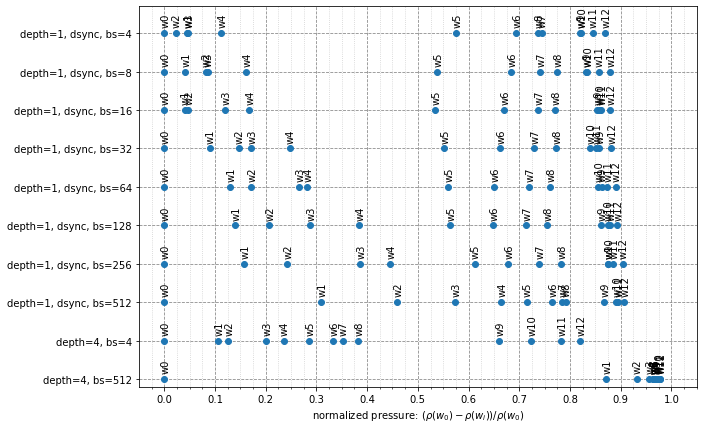

In [3]:
k, d, w = 'k504', 's970evp250', 'workloada'
files = plot.getFiles(exp_dir, str_filter=f'07_{k}_{d}-ycsb_{w}-at3_pres3n4i2')
plot.plotFiles(files, options, allfiles=f'{exp_dir}/07_{k}_{d}-ycsb_{w}-at3_pres3n4i2_all')

## YCSB workload A, Kernel 5.8, Device 970 EVO Plus 250GB

Graphs from file "./07_k508_s970evp250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs4.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs8.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs16.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs32.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs64.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs128.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs256.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs512.out.xz":
AllFiles Graphs:


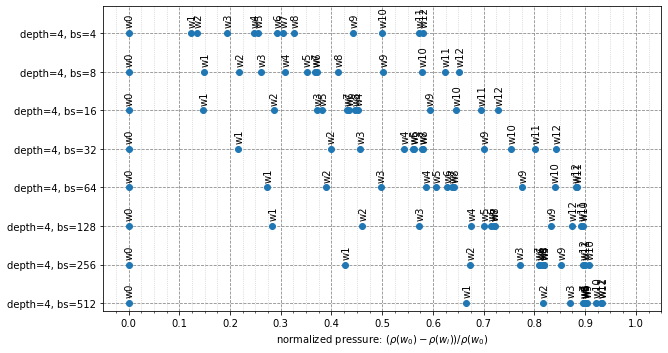

In [4]:
k, d, w = 'k508', 's970evp250', 'workloada'
files = plot.getFiles(exp_dir, str_filter=f'07_{k}_{d}-ycsb_{w}-at3_pres3n4i2')
plot.plotFiles(files, options, allfiles=f'{exp_dir}/07_{k}_{d}-ycsb_{w}-at3_pres3n4i2_all')

## YCSB workload A, Kernel 5.4, Device 980 PRO 250GB

Graphs from file "./07_k504_s980pro250-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs4.out.xz":
Graphs from file "./07_k504_s980pro250-ycsb_workloada-at3_pres3n4i2_depth2_eng_libaio_dsync_true_bs4.out.xz":
Graphs from file "./07_k504_s980pro250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_true_bs4.out.xz":
AllFiles Graphs:


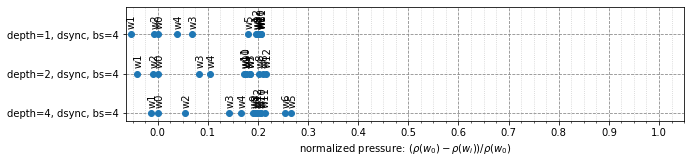

In [12]:
k, d, w = 'k504', 's980pro250', 'workloada'
files = plot.getFiles(exp_dir, str_filter=f'07_{k}_{d}-ycsb_{w}-at3_pres3n4i2')
plot.plotFiles(files, options, allfiles=f'{exp_dir}/07_{k}_{d}-ycsb_{w}-at3_pres3n4i2_all')

## YCSB workload A, Kernel 5.8, Device 980 PRO 250GB

Graphs from file "./07_k508_s980pro250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs4.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs8.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs16.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs32.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs64.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs128.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs256.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloada-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs512.out.xz":
AllFiles Graphs:


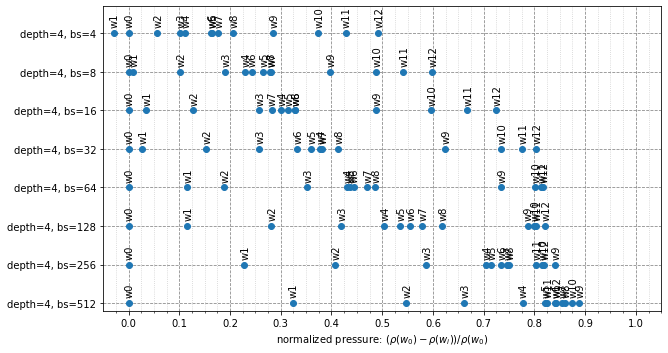

In [6]:
k, d, w = 'k508', 's980pro250', 'workloada'
files = plot.getFiles(exp_dir, str_filter=f'07_{k}_{d}-ycsb_{w}-at3_pres3n4i2')
plot.plotFiles(files, options, allfiles=f'{exp_dir}/07_{k}_{d}-ycsb_{w}-at3_pres3n4i2_all')

## YCSB workload B, Kernel 5.4, Device 970 EVO Plus 250GB

Graphs from file "./07_k504_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs4.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs8.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs16.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs32.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs64.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs128.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs256.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs512.out.xz":
Graphs from file "./07_k504_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs4.out.xz":


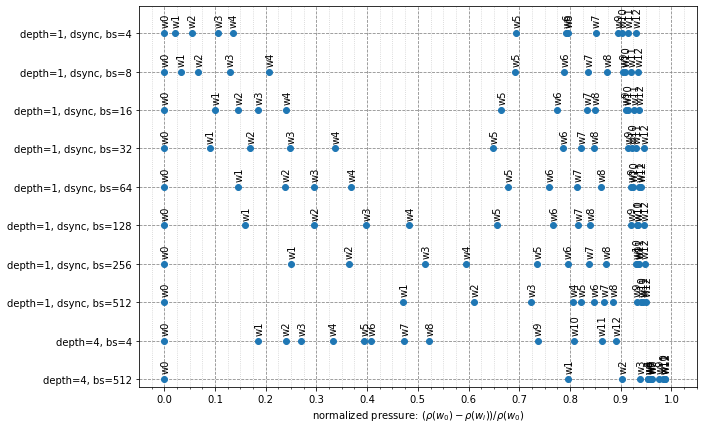

In [7]:
k, d, w = 'k504', 's970evp250', 'workloadb'
files = plot.getFiles(exp_dir, str_filter=f'07_{k}_{d}-ycsb_{w}-at3_pres3n4i2')
plot.plotFiles(files, options, allfiles=f'{exp_dir}/07_{k}_{d}-ycsb_{w}-at3_pres3n4i2_all')

## YCSB workload B, Kernel 5.8, Device 970 EVO Plus 250GB

Graphs from file "./07_k508_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs4.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs8.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs16.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs32.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs64.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs128.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs256.out.xz":
Graphs from file "./07_k508_s970evp250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs512.out.xz":
AllFiles Graphs:


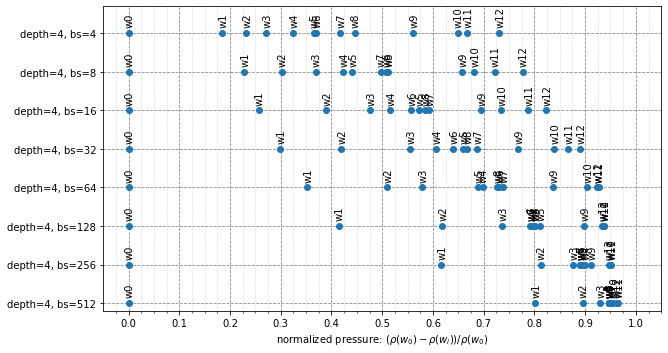

In [8]:
k, d, w = 'k508', 's970evp250', 'workloadb'
files = plot.getFiles(exp_dir, str_filter=f'07_{k}_{d}-ycsb_{w}-at3_pres3n4i2')
plot.plotFiles(files, options, allfiles=f'{exp_dir}/07_{k}_{d}-ycsb_{w}-at3_pres3n4i2_all')

## YCSB workload B, Kernel 5.4, Device 980 PRO 250GB

In [9]:
k, d, w = 'k504', 's980pro250', 'workloadb'
files = plot.getFiles(exp_dir, str_filter=f'07_{k}_{d}-ycsb_{w}-at3_pres3n4i2')
plot.plotFiles(files, options, allfiles=f'{exp_dir}/07_{k}_{d}-ycsb_{w}-at3_pres3n4i2_all')

AllFiles Graphs:


## YCSB workload B, Kernel 5.8, Device 980 PRO 250GB

Graphs from file "./07_k508_s980pro250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs4.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs8.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs16.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs32.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs64.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs128.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs256.out.xz":
Graphs from file "./07_k508_s980pro250-ycsb_workloadb-at3_pres3n4i2_depth4_eng_libaio_dsync_false_bs512.out.xz":
AllFiles Graphs:


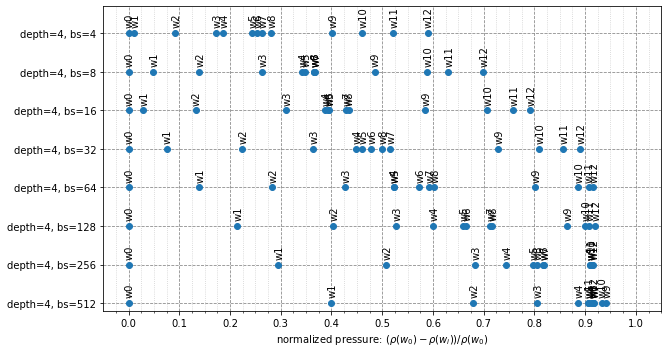

In [10]:
k, d, w = 'k508', 's980pro250', 'workloadb'
files = plot.getFiles(exp_dir, str_filter=f'07_{k}_{d}-ycsb_{w}-at3_pres3n4i2')
plot.plotFiles(files, options, allfiles=f'{exp_dir}/07_{k}_{d}-ycsb_{w}-at3_pres3n4i2_all')

## Test

Graphs from file "./07_k504_s970evp250_test-ycsb_workloada-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs4.out.xz":
Graphs from file "./07_k504_s970evp250_test-ycsb_workloada-at3_pres3n4i2_depth1_eng_posix_dsync_true_bs4.out.xz":
Graphs from file "./07_k504_s970evp250_test-ycsb_workloadb-at3_pres3n4i2_depth1_eng_libaio_dsync_true_bs4.out.xz":
Graphs from file "./07_k504_s970evp250_test-ycsb_workloadb-at3_pres3n4i2_depth1_eng_posix_dsync_true_bs4.out.xz":
AllFiles Graphs:


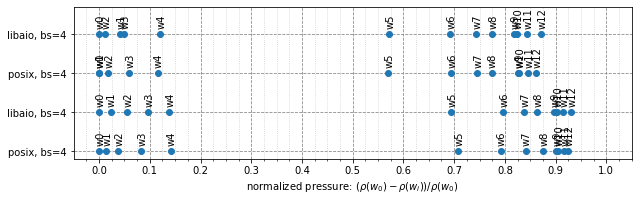

In [11]:
label = lambda f: f'{f._params["at_io_engine[0]"]}, bs={f._params["at_block_size[0]"]}'

files = plot.getFiles(exp_dir, list_filter=['07_', '_test-'])
plot.plotFiles(files, options(all_pressure_label=label), allfiles=f'{exp_dir}/07_test_all')